# EDA Step 3 and 4 - Explore and clean your data

To Do's: Have a look at:
- Distribution of your data
- Skewness, kurtosis
- Centrality and spread
- Unexpected values (e.g. Outliers) - **Are they really outliers? Deal with them!**
- Missing values - **Why are they missing? Deal with them!**
- Re-express your data if needed: log, root,...

**Always follow your assumptions/hypotheses during your analysis!**

### Task

We will continue with our analysis on the [life expectancy dataset](https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who?select=Life+Expectancy+Data.csv).

Remember what you have already learned about the dataset. If anything is not clear or well understood yet, just read on Kaggle or google<br> things for understanding your data.

Recall the hypotheses you made, then read in the data before continuing with the tasks.

In [30]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#Load the data
df = pd.read_csv(r'C:\Users\sruth\Documents\Greenbootcamps\DS_First_EDA_Project\data\Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


1. What format is the data in ```(int=number, float= decimal number, object=text)```? Which formats are surprising? ```(Tip: df.info(), df.dtypes)```


If you find surprising data types, find a reason (f.e. unexpected values like a '?' could cause a mix-up in the data-types)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [32]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

2. Are there any missing values? In which columns?

In [33]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

When different users manually enter data and use different labelings for missing values ```(f.e. “n/a”, “na”, "?" …)```<br>
Pandas does not recognize these as missings. <br>
```
Replace them by NaN: df['column_name'].replace('?', np.NaN)
```

Or:

```
Make a list of missing value types and read in df again
```

```
missing_values = ["n/a", "na", "--"] (extent list if you catch new ones)
```

```
df = pd.read_csv("data.csv", na_values = missing_values)
```

**You may not find these non-standard or unexpected values right away - the next steps may reveal them so that you can come back to this step<br> later on.**

3. How many missing values do you have per column? ```(Tip: df.isnull().sum())```

Why are there missing values? Is this value missing because it wasn't recorded or because it doesn't exist?<br>
The next steps will support you to answer this question.

In [34]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [35]:
# For object/string columns, fill NaN with 'Unknown'
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna('Unknown')

In [36]:
# For numeric columns, fill NaN with 0
for col in df.select_dtypes(include=[np.number]).columns:
    df[col] = df[col].fillna(0)

In [37]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

4. How many unique values are there for the individual variables? ```(Tip: df.nunique())```

In [38]:
df.nunique()

Country                             193
Year                                 16
Status                                2
Life expectancy                     363
Adult Mortality                     426
infant deaths                       209
Alcohol                            1077
percentage expenditure             2328
Hepatitis B                          88
Measles                             958
 BMI                                609
under-five deaths                   252
Polio                                74
Total expenditure                   819
Diphtheria                           82
 HIV/AIDS                           200
GDP                                2491
Population                         2279
 thinness  1-19 years               201
 thinness 5-9 years                 208
Income composition of resources     625
Schooling                           173
dtype: int64

5. For the variables you are interested in due to your hypotheses, what are the unique values?

Do they make sense? ```(Tip: df[column_name'].value_counts())```

In [39]:
df['Status'].value_counts()


Status
Developing    2426
Developed      512
Name: count, dtype: int64

6. Describe the columns you are interested in due to your hypotheses by descriptive statistics. ```(Tip: df.describe())```

In [40]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.00000,2938.000000
mean,2007.518720,68.989312,164.235534,30.303948,4.298928,738.251295,65.705582,2419.592240,37.877774,42.035739,82.016338,5.481406,81.791695,1.742103,6342.091419,9.923150e+06,4.783696,4.813955,0.59188,11.327434
std,4.613841,10.327437,124.451093,117.926501,4.079748,1987.914858,38.878316,11467.272489,20.344920,160.445548,24.271835,2.875063,24.544100,5.077785,13409.501883,5.407586e+07,4.424924,4.512880,0.25114,4.265626
min,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,2004.000000,63.000000,73.000000,0.000000,0.470000,4.685343,24.000000,0.000000,19.000000,0.000000,77.000000,3.740000,78.000000,0.100000,190.174435,5.874250e+03,1.500000,1.500000,0.46500,9.500000
50%,2008.000000,72.000000,144.000000,3.000000,3.130000,64.912906,87.000000,17.000000,43.000000,4.000000,93.000000,5.540000,93.000000,0.100000,1171.983435,5.393575e+05,3.300000,3.300000,0.66200,12.100000
75%,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.77200,14.100000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.94800,20.700000


7. Back to the missing values: You need to deal with them.

- If missing, because value does not exist: ```Keep as NaN```
- If missing, because value was not recorded: Try to guess, using ```imputation methods``` like ```df['column_name'].fillna(0, inplace=True)``` or other<br> more suitable ones
- If you decide to ignore them: Drop rows or columns with any missing value ```(df.dropna(axis=0))```

Use these links to explore these methods in detail:

- https://www.w3schools.com/python/pandas/ref_df_fillna.asp
- https://www.studytonight.com/pandas/pandas-dataframe-fillna-method
- https://www.geeksforgeeks.org/python-pandas-series-fillna/
- https://towardsdatascience.com/how-to-fill-missing-data-with-pandas-8cb875362a0d


In [41]:
# df.columns = df.columns.str.replace(' ', '_')
df.columns = df.columns.str.strip().str.replace(' ', '_')
df.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness__1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


8. How are the variables you are interested in, due to your hypotheses distributed?

- Are they skewed?
- Are there any outliers?<br>
```(Tip: Use histograms and boxplots)```

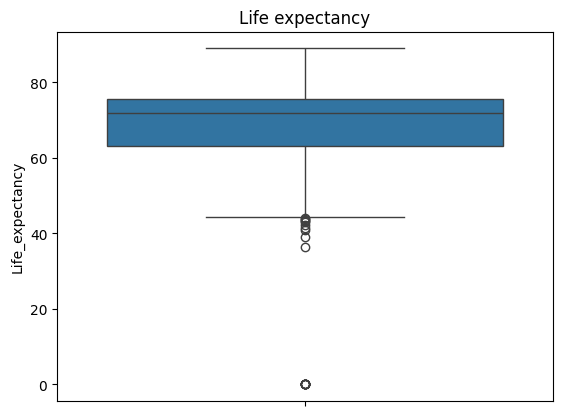

In [47]:
sns.boxplot(data = df,y=df["Life_expectancy"])
plt.title('Life expectancy')
plt.show()

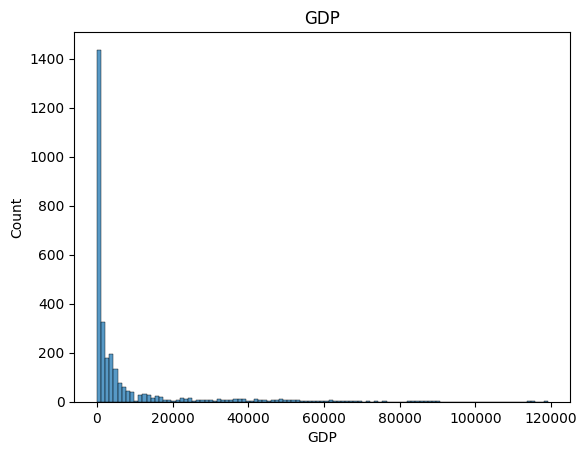

In [48]:
sns.histplot(data = df,x=df["GDP"])
plt.title('GDP')
plt.show()

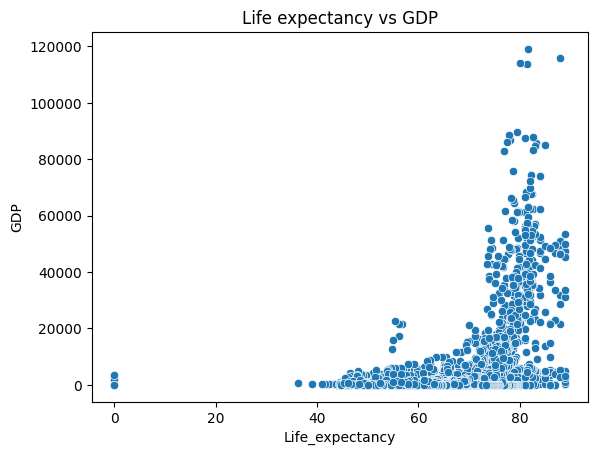

In [45]:
sns.scatterplot(data = df,x='Life_expectancy',y='GDP')
plt.title('Life expectancy vs GDP')
plt.show()

9. Outliers: Have you detected outliers? Can you explain them?

What do you want to do about them?

Use these links to answer your question:
- https://www.linkedin.com/pulse/tuesdayeda-handling-outliers-exploratory-data-thomas-reinecke/
- https://www.analyticsvidhya.com/blog/2021/05/detecting-and-treating-outliers-treating-the-odd-one-out/
- https://neuraldatascience.io/5-eda/data_cleaning.html
- https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/